<a href="https://colab.research.google.com/github/ovian4016-dot/produksi-kelinci-ml/blob/main/Proyek_kelinci.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Analisis Faktor-Faktor Produksi Kelinci di Kecamatan Bumiaji
Proyek ini bertujuan untuk mengetahui faktor-faktor yang memengaruhi produksi kelinci, menggunakan model regresi linear berbasis data peternak.

## 1. Import Library & Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Proyek Kelinci/data_produksi_kelinci.csv')

## 2. Eksplorasi Data Awal

In [ ]:
df.head()

,Produksi,Modal,Lahan,Keterampilan,Pakan
0,100,500000,20,90,1300000
1,40,2000000,50,15,1000000
2,3000,50000000,255,75,15000000
3,105,2500000,28,30,1440000
4,100,1450000,20,50,750000


In [ ]:
df.describe()

,Produksi,Modal,Lahan,Keterampilan,Pakan
count,30.000000,3.000000e+01,30.000000,30.000000,3.000000e+01
mean,276.000000,5.025333e+06,70.366667,52.333333,2.552333e+06
std,625.012276,9.742677e+06,53.986258,24.555824,4.183718e+06
min,20.000000,4.000000e+05,20.000000,5.000000,2.500000e+05
25%,60.000000,1.200000e+06,31.500000,32.500000,1.000000e+06
50%,100.000000,1.660000e+06,50.500000,57.500000,1.500000e+06
75%,150.000000,3.600000e+06,83.000000,65.000000,2.000000e+06
max,3000.000000,5.000000e+07,255.000000,90.000000,2.000000e+07


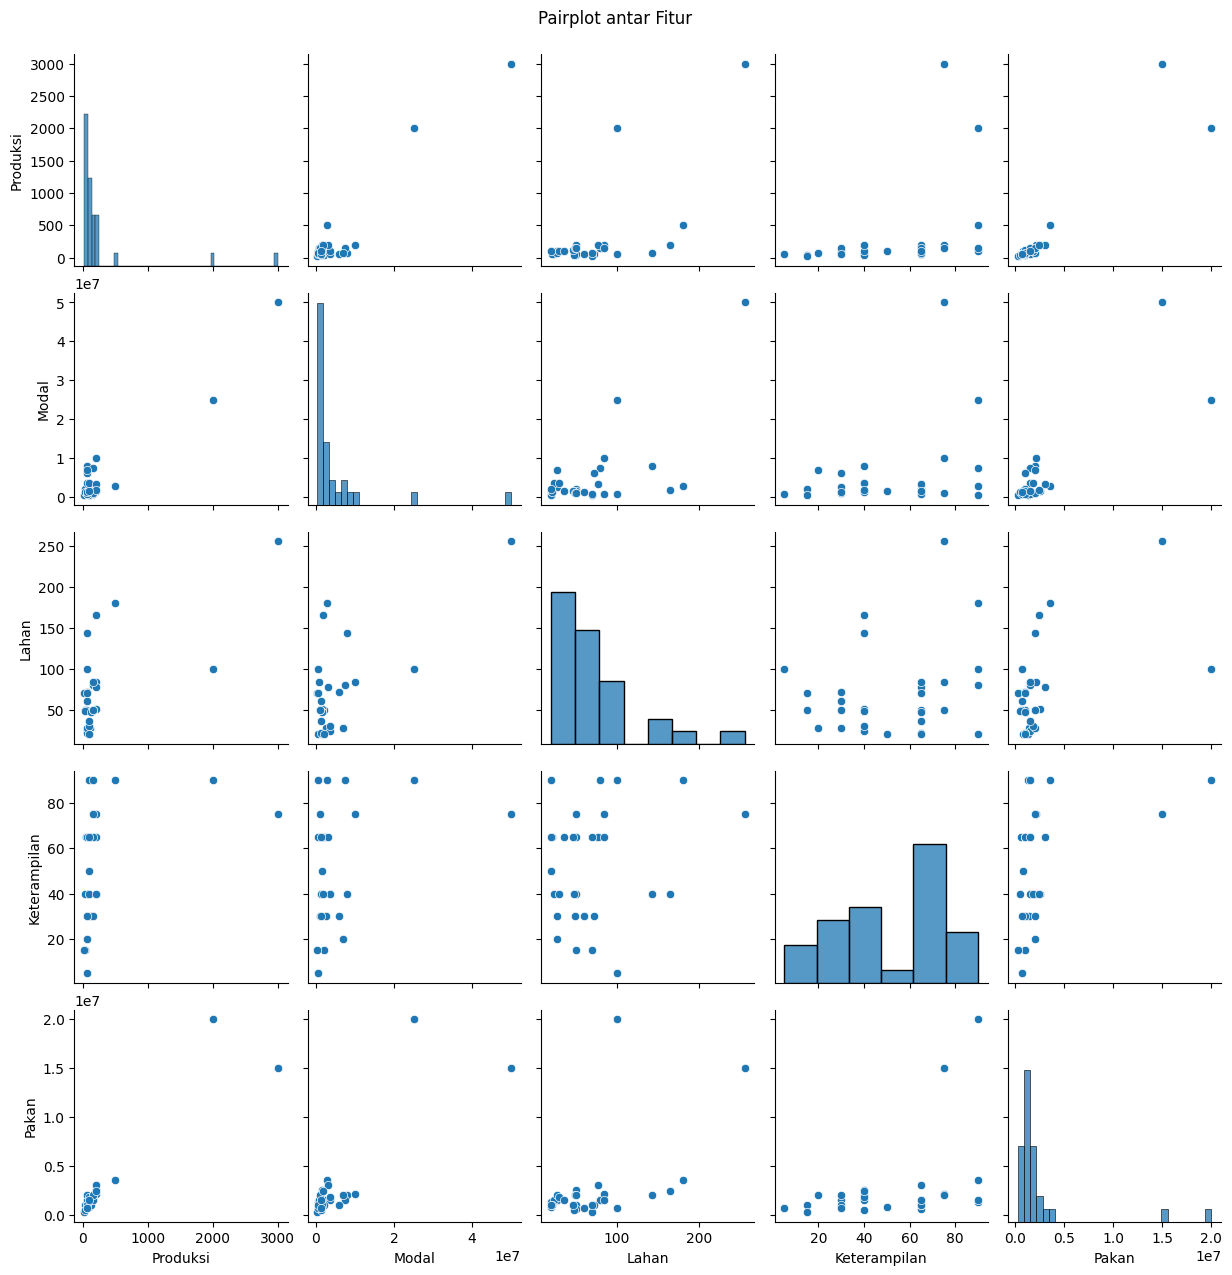

In [ ]:
# Pairplot visualisasi hubungan antar fitur
sns.pairplot(df)
plt.suptitle("Pairplot antar Fitur", y=1.02)
plt.show()

## 3. Regresi Linear Awal (Baseline)

Sebelum preprocessing, saya coba model regresi linear dasar untuk melihat performa awal.

In [ ]:
# Pisahkan fitur dan target
X = df[['Modal', 'Lahan', 'Keterampilan', 'Pakan']]
y = df['Produksi']

# Bagi data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Buat dan latih model
model = LinearRegression()
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

In [ ]:
# Hitung evaluasi
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2:.2f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

R² Score: 0.02
MAE: 335.09
RMSE: 666.84


In [ ]:
# Koefisien dan Intercept
for col, coef in zip(X.columns, model.coef_):
    print(f"{col}: {coef:.2f}")
print(f"Intercept: {model.intercept_:.2f}")

Modal: 0.00
Lahan: -0.13
Keterampilan: 0.29
Pakan: 0.00
Intercept: -163.60


##Interpretasi Awal
**Evaluasi:**
- R²: 0.02 → Model belum bisa jelaskan variasi produksi
- MAE: 335.09 → Rata-rata kesalahan prediksi sebesar 335 ekor
- RMSE: 506.81 → Ada prediksi yang sangat meleset

**Koefisien:**
- Keterampilan (+0.29) → Satu-satunya faktor yang cukup berpengaruh
- Lahan (-0.13) → Perlu investigasi lebih lanjut
- Modal dan Pakan (0.00) → Mungkin perlu di-scaling

## 4. Eksperimen Scaling (StandardScaler)

Saya mencoba scaling data untuk melihat apakah dapat meningkatkan performa model.

In [ ]:
# Inisialisasi scaler
scaler = StandardScaler()

# Fit dan transform fitur
X_scaled = scaler.fit_transform(X)

# Split ulang data yang sudah di-scaling
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [ ]:
#Buat data latih model scaling
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)

# Prediksi
y_pred_scaled = model_scaled.predict(X_test_scaled)

In [ ]:
# Evaluasi hasil prediksi
r2_scaled = r2_score(y_test, y_pred_scaled)
mae_scaled = mean_absolute_error(y_test, y_pred_scaled)
rmse_scaled = np.sqrt(mean_squared_error(y_test, y_pred_scaled))

print(f"[SETELAH SCALING]")
print(f"R² Score: {r2_scaled:.2f}")
print(f"MAE: {mae_scaled:.2f}")
print(f"RMSE: {rmse_scaled:.2f}")

[SETELAH SCALING]
R² Score: 0.02
MAE: 335.09
RMSE: 666.84


In [ ]:
# Koefisien model setelah scaling
for col, coef in zip(X.columns, model_scaled.coef_):
    print(f"{col}: {coef:.2f}")
print(f"Intercept: {model_scaled.intercept_:.2f}")

Modal: 83.02
Lahan: -6.79
Keterampilan: 7.09
Pakan: 730.08
Intercept: 339.32


##Kesimpulan:

Scaling berhasil membuat **koefisien jadi lebih proporsional**, tapi **tidak memperbaiki akurasi** model. Ini artinya:

→ Masalah utamanya bukan skala fitur

→ **Kemungkinan besar karena outlier dan kecilnya dataset**

## 5. Eksperimen Decision Tree Regressor

Uji model non-linear yaitu Decision Tree.

In [ ]:
# Buat model decision tree
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)  # tanpa scaling pun bisa

# Prediksi dan evaluasi
y_pred_tree = tree_model.predict(X_test)
print(f"[MODEL TREE]")
print(f"R²: {r2_score(y_test, y_pred_tree):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_tree):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_tree)):.2f}")

[MODEL TREE]
R²: -0.22
MAE: 370.00
RMSE: 745.99



##Kesimpulan

Decision Tree **mungkin terlalu overfit**, karena:


 → Dataset hanya 30 data



→ Struktur datanya tidak punya pola jelas



→ Belum pruning/pengaturan max_depth

## 6. Deteksi dan Bersihkan Outlier

Outlier berpotensi mempengaruhi model. Kita bersihkan outlier dari fitur yang sensitif.

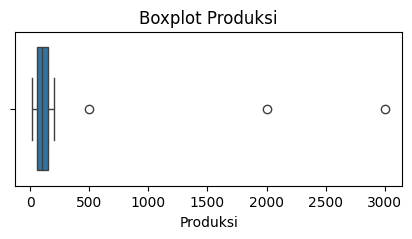

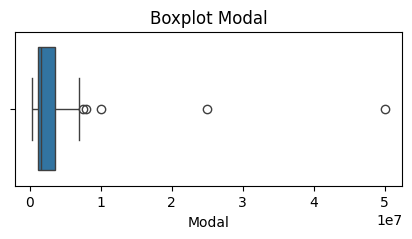

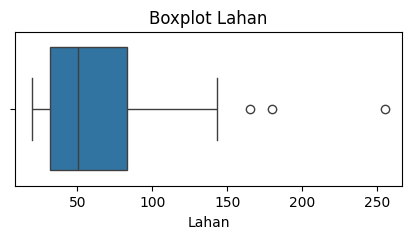

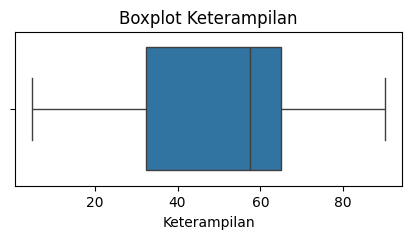

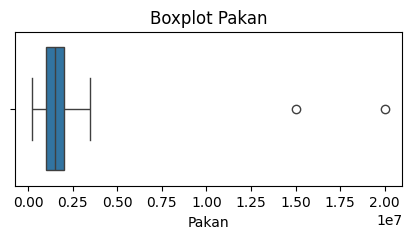

In [ ]:
# Visualisasi boxplot untuk semua kolom (mendeteksi outlier)
for col in df.columns:
    plt.figure(figsize=(5, 2))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot {col}")
    plt.show()

In [ ]:
# Fungsi hapus outlier IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Bersihkan kolom yang ada outlier-nya
df_clean = df.copy()
for col in ['Produksi', 'Modal', 'Pakan', 'Lahan']:
    df_clean = remove_outliers_iqr(df_clean, col)

print("Jumlah data awal:", len(df))
print("Jumlah data setelah bersih:", len(df_clean))

Jumlah data awal: 30
Jumlah data setelah bersih: 21


## 7. Regresi Linear Setelah Outlier Dibersihkan

In [ ]:
# Split data bersih
X_clean = df_clean[['Modal', 'Lahan', 'Keterampilan', 'Pakan']]
y_clean = df_clean['Produksi']

X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(
    X_clean, y_clean, test_size=0.2, random_state=42
)

# Model regresi baru
model_clean = LinearRegression()
model_clean.fit(X_train_clean, y_train_clean)
y_pred_clean = model_clean.predict(X_test_clean)

# Evaluasi
r2_clean = r2_score(y_test_clean, y_pred_clean)
mae_clean = mean_absolute_error(y_test_clean, y_pred_clean)
rmse_clean = np.sqrt(mean_squared_error(y_test_clean, y_pred_clean))

print(f"[MODEL SETELAH OUTLIER DIHAPUS]")
print(f"R² Score: {r2_clean:.2f}")
print(f"MAE: {mae_clean:.2f}")
print(f"RMSE: {rmse_clean:.2f}")

[MODEL SETELAH OUTLIER DIHAPUS]
R² Score: 0.79
MAE: 16.12
RMSE: 18.69


In [ ]:
# Tampilkan koefisien model baru
for col, coef in zip(X_clean.columns, model_clean.coef_):
    print(f"{col}: {coef:.2f}")
print(f"Intercept: {model_clean.intercept_:.2f}")

Modal: -0.00
Lahan: 0.29
Keterampilan: 0.33
Pakan: 0.00
Intercept: -12.28


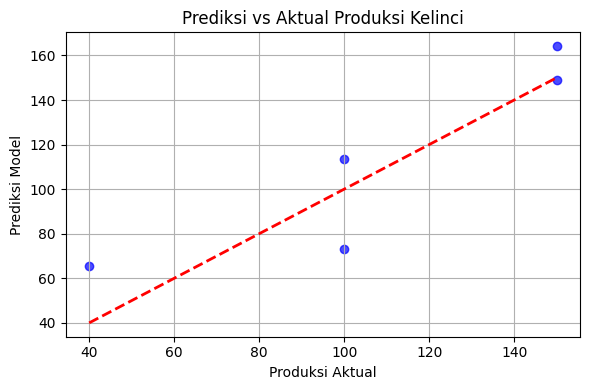

In [ ]:
plt.figure(figsize=(6, 4))
plt.scatter(y_test_clean, y_pred_clean, color='blue', alpha=0.7)
plt.plot([y_test_clean.min(), y_test_clean.max()],
         [y_test_clean.min(), y_test_clean.max()],
         'r--', lw=2)
plt.xlabel('Produksi Aktual')
plt.ylabel('Prediksi Model')
plt.title('Prediksi vs Aktual Produksi Kelinci')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
hasil_prediksi = pd.DataFrame({
    "Produksi Aktual": y_test_clean.values,
    "Produksi Prediksi": y_pred_clean
})
hasil_prediksi.to_csv("hasil_prediksi_kelinci.csv", index=False)

### Kesimpulan
Model regresi linear mampu memprediksi produksi kelinci berdasarkan modal, lahan, keterampilan, dan pakan, dengan hasil evaluasi:

- R²: 0.79 — artinya 79% variasi produksi dapat dijelaskan oleh model.
- MAE: 16.12 ekor
- RMSE: 18.69 ekor

Fitur yang paling berpengaruh adalah **keterampilan** dan **lahan**, sementara **modal** dan **pakan** tampaknya tidak signifikan.

Hasil ini menunjukkan bahwa peningkatan keterampilan peternak dan pemanfaatan lahan yang optimal dapat membantu meningkatkan produksi kelinci.

## 🙌 Terima Kasih
Proyek ini dibuat sebagai bagian dari portofolio pribadi saya dalam bidang **data analysis & machine learning** dengan pendekatan sederhana namun berdampak nyata.  
Saya terbuka untuk kolaborasi, diskusi, atau saran.  
✨ Kontak saya: https://id.linkedin.com/in/oktavian-sahfira